In [180]:
# Import dependencies
import praw
from psaw import PushshiftAPI
import pandas as pd
import datetime
from config import client_id, client_secret, user_agent

In [181]:
# Set up API credentials
reddit = praw.Reddit(client_id = client_id,
                     client_secret = client_secret,
                     user_agent = user_agent)
api = PushshiftAPI()

In [182]:
# Search dates
posted_after = int(datetime.datetime(2020, 11, 1).timestamp())
posted_before = int(datetime.datetime(2020, 11, 30).timestamp())

# Query cryptocurrency subreddit
query1 = api.search_comments(subreddit='cryptocurrency',
                             q="bitcoin|btc",
                             after=posted_after,
                             before=posted_before,
                             limit=10000)

# Query bitcoin subreddit
query2 = api.search_comments(subreddit='bitcoin',
                             q="bitcoin|btc",
                             after=posted_after,
                             before=posted_before,
                             limit=10000)

# Query btc subreddit
query3 = api.search_comments(subreddit='btc',
                             q="bitcoin|btc",
                             after=posted_after,
                             before=posted_before,
                             limit=10000)

In [183]:
# Setup list and add query1 results to it
submissions = list()

for element in query1:
    submissions.append(element.d_)
print(len(submissions))

1000


In [184]:
# Add query2 results
for element in query2:
    submissions.append(element.d_)
print(len(submissions))

2000


In [185]:
# Add query3 results
for element in query3:
    submissions.append(element.d_)
print(len(submissions))

3000


In [193]:
# Convert to dataframe
df = pd.DataFrame(submissions)

In [194]:
# Keep only the needed columns
df = df[['id', 'score', 'subreddit', 'body', 'created_utc']]

In [195]:
df.head()

,id,score,subreddit,body,created_utc
0,ge4omw2,1,CryptoCurrency,I know how you feel. Bitcoin turned me into a ...,1606722416
1,ge4ogy4,1,CryptoCurrency,They work in different ways depending on the c...,1606722266
2,ge4ocqr,1,CryptoCurrency,[**Raoul Pal**@RaoulGMI](https://twitter.com/R...,1606722162
3,ge4nyor,1,CryptoCurrency,Every comment you’ve made so far is getting ma...,1606721809
4,ge4njbw,0,CryptoCurrency,You know why I won’t use Nano? Same reason why...,1606721420


In [196]:
# Convert to datetime and sort by it
df['datetime'] = df['created_utc'].map(lambda t: datetime.datetime.fromtimestamp(t))
df = df.drop('created_utc', axis=1)
df = df.sort_values(by='datetime')
df

,id,score,subreddit,body,datetime
2999,gdgpvjs,1,btc,It seems you're being downvoted by bitcoin cas...,2020-11-24 09:42:11
2998,gdgpzbm,1,btc,"Assuming its an honest question, a LN wallet i...",2020-11-24 09:42:59
2997,gdgq5te,1,btc,Yup! Losses deduct from your income. https://c...,2020-11-24 09:44:20
2996,gdgqvq3,2,btc,Then you'll be able to dump your bags and buy ...,2020-11-24 09:49:46
2995,gdgrg69,1,btc,How is the fact that I bought a gift card make...,2020-11-24 09:54:03
...,...,...,...,...,...
2002,ge4os6b,1,btc,That's BTC,2020-11-29 23:49:12
2001,ge4oycz,1,btc,All the developers work on core tho. The peopl...,2020-11-29 23:51:51
1001,ge4ozku,1,Bitcoin,Can you tell me how does Monero provides anony...,2020-11-29 23:52:23
2000,ge4p5ab,1,btc,You know that satoshi and a few other early mi...,2020-11-29 23:54:50


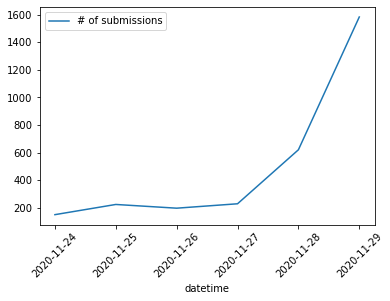

In [197]:
# Display # of results by date
df.groupby(by=df.datetime.dt.date).count().plot(y='id', rot=45, label='# of submissions')